### Introduction to Regular Expressions or RegEx

Regular expressions (called REs, or regexes, or regex patterns) are essentially a tiny, highly specialized programming language embedded inside Python and made available through the re module. Using this little language, you specify the rules for the set of possible strings that you want to match; this set might contain English sentences, or e-mail addresses, or TeX commands, or anything you like. You can then ask questions such as “Does this string match the pattern?”, or “Is there a match for the pattern anywhere in this string?”. You can also use REs to modify a string or to split it apart in various ways.

Regular expressions can include a variety of rules, fro finding repetition, to text-matching, and much more. As you advance in Python you'll see that a lot of your parsing problems can be solved with regular expressions (they're also a common interview question!).



In [5]:
import re

# List of patterns to search for
patterns = [ 'apple', 'orange' ]

# Text to parse
text = 'This is a string with apple, but it does not have mangoes.' 
#purposefully did not include oranges. Check how output changes when you remove mangoes and put oranges

for pattern in patterns:
    print ('Searching for "%s" in: \n"%s"' % (pattern, text)),
    
    #Check for match
    if re.search(pattern,  text):
        print ('\n')
        print ('Match was found. \n')
    else:
        print ('\n')
        print ('No Match was found.\n')

Searching for "apple" in: 
"This is a string with apple, but it does not have mangoes."


Match was found. 

Searching for "orange" in: 
"This is a string with apple, but it does not have mangoes."


No Match was found.



In [7]:
# List of patterns to search for
pattern = 'apple'

# Text to parse
text = 'This is a string with apple, but there are also mango and orange.'

match = re.search(pattern,  text) # to see where the search is going to be

type(match)

re.Match

In [8]:
# Show the sequence number of start of match
match.start()

22

In [9]:
match.end() #show where our word ends sequentially

27

### Find all instances of a pattern
You can use re.findall() to find all the instances of a pattern in a string. For example:



In [11]:
# Returns a list of all matches
re.findall('match','IPL cricket match word is in middle')

['match']

#### Split with regular expressions
Let's see how we can split with the re syntax. This should look similar to how you used the split() method with strings.



In [12]:

# Term to split on
split_term = '@'

phrase = 'What is the domain name of someone with the email: hello@gmail.com'

# Split the phrase
re.split(split_term,phrase)

['What is the domain name of someone with the email: hello', 'gmail.com']

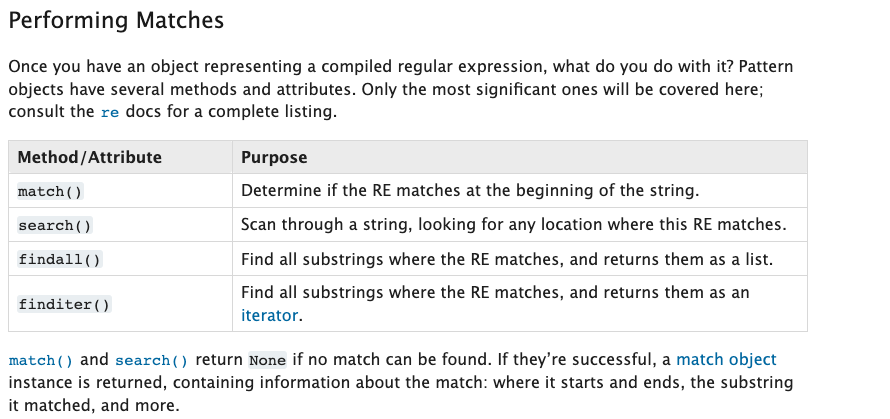

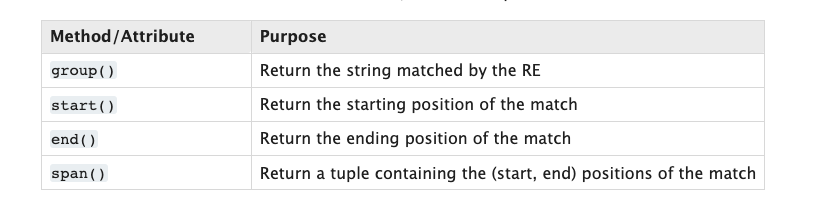

### Pattern re Syntax
Regular expressions supports a huge variety of patterns the just simply finding where a single string occurred.

We can use metacharacters along with re to find specific types of patterns.

Since we will be testing multiple re syntax forms, let's create a function that will print out results given a list of various regular expressions and a phrase to parse:

Metacharacters can also be used - `. ^ $ * + ? { } [ ] \ | ( )`

In [15]:
def multi_re_find(patterns,phrase):
    '''
    Takes in a list of regex patterns
    Prints a list of all matches
    '''
    for pattern in patterns:
        print ('Searching the phrase using the re check: %r' %pattern)
        print (re.findall(pattern,phrase))
        print ('\n')

In [16]:
test_phrase = 'sdsd..sssddd...sdddsddd...dsds...dsssss...sdddd'

test_patterns = [ 'sd*',     # s followed by zero or more d's
                'sd+',          # s followed by one or more d's
                'sd?',          # s followed by zero or one d's
                'sd{3}',        # s followed by three d's
                'sd{2,3}',      # s followed by two to three d's
                ]

multi_re_find(test_patterns,test_phrase)

Searching the phrase using the re check: 'sd*'
['sd', 'sd', 's', 's', 'sddd', 'sddd', 'sddd', 'sd', 's', 's', 's', 's', 's', 's', 'sdddd']


Searching the phrase using the re check: 'sd+'
['sd', 'sd', 'sddd', 'sddd', 'sddd', 'sd', 'sdddd']


Searching the phrase using the re check: 'sd?'
['sd', 'sd', 's', 's', 'sd', 'sd', 'sd', 'sd', 's', 's', 's', 's', 's', 's', 'sd']


Searching the phrase using the re check: 'sd{3}'
['sddd', 'sddd', 'sddd', 'sddd']


Searching the phrase using the re check: 'sd{2,3}'
['sddd', 'sddd', 'sddd', 'sddd']




#### Repetition Syntax¶
There are five ways to express repetition in a pattern:

1.) A pattern followed by the meta-character * is repeated zero or more times. 
2.) Replace the * with + and the pattern must appear at least once. 
3.) Using ? means the pattern appears zero or one time. 
4.) For a specific number of occurrences, use {m} after the pattern, where m is replaced with the number of times         the pattern should repeat. 
5.) Use {m,n} where m is the minimum number of repetitions and n is the maximum. Leaving out n ({m,}) means the           value appears at least m times, with no maximum.

### Grouping

Frequently you need to obtain more information than just whether the RE matched or not. Regular expressions are often used to dissect strings by writing a RE divided into several subgroups which match different components of interest. For example, an RFC-822 header line is divided into a header name and a value, separated by a ':', like this:

`From: author@example.com
User-Agent: Thunderbird 1.5.0.9 (X11/20061227)
MIME-Version: 1.0
To: editor@example.com`

This can be handled by writing a regular expression which matches an entire header line, and has one group which matches the header name, and another group which matches the header’s value.

Groups are marked by the `'(', ')'` metacharacters. `'('` and `')'` have much the same meaning as they do in mathematical expressions; they group together the expressions contained inside them, and you can repeat the contents of a group with a repeating qualifier, such as` *, +, ?, or {m,n}`. For example, `(ab)*` will match zero or more repetitions of `ab`.

In [27]:
p = re.compile('(ab)*')
print(p.match('abababababcdcdcdccdefefefefefefabababab').span())

(0, 10)


Groups indicated with `'(', ')'` also capture the starting and ending index of the text that they match; this can be retrieved by passing an argument to `group()`, `start()`, `end()`, and `span()`. Groups are numbered starting with 0. Group 0 is always present; it’s the whole RE, so match object methods all have group `0` as their default argument. Later we’ll see how to express groups that don’t capture the span of text that they match.

In [28]:
p = re.compile('(a)b')
m = p.match('ab')
m.group()

'ab'

In [29]:
m.group(0)

'ab'

### Search and Replace

Another common task is to find all the matches for a pattern, and replace them with a different string. The `sub()` method takes a replacement value, which can be either a string or a function, and the string to be processed.

`sub(replacement, string[, count=0])`
Returns the string obtained by replacing the leftmost non-overlapping occurrences of the `RE` in string by the replacement replacement. If the pattern isn’t found, string is returned unchanged.

The optional argument count is the maximum number of pattern occurrences to be replaced; count must be a non-negative integer. The default value of `0` means to replace all occurrences.

Here’s a simple example of using the `sub()` method. It replaces colour names with the word `colour`:

In [32]:
p = re.compile('(blue|white|red)')
p.sub('colour', 'blue socks and red shoes')

'colour socks and colour shoes'

In [33]:
p.sub('colour', 'blue socks and red shoes', count=1)

'colour socks and red shoes'

### Using String Methods - `match()` vs `search()`

The `match()` function only checks if the RE matches at the beginning of the string while `search()` will scan forward through the string for a match. It’s important to keep this distinction in mind. Remember, `match(`) will only report a successful match which will start at 0; if the match wouldn’t start at zero, `match()` will not report it.

In [34]:
print(re.match('super', 'superstition').span())

(0, 5)


In [35]:
print(re.match('super', 'insuperable'))

None


On the other hand, `search()` will scan forward through the string, reporting the first match it finds.

In [36]:
print(re.search('super', 'superstition').span())

(0, 5)


In [37]:
print(re.search('super', 'insuperable').span())

(2, 7)


### Character Ranges
As character sets grow larger, typing every character that should (or should not) match could become very tedious. A more compact format using character ranges lets you define a character set to include all of the contiguous characters between a start and stop point. The format used is [start-end].

Common use cases are to search for a specific range of letters in the alphabet, such [a-f] would return matches with any instance of letters between a and f.

Let's walk through some examples:

In [39]:
test_phrase = 'This is an example sentence dear students of simplilearn. Lets see if we can find some letters.'

test_patterns=[ '[a-z]+',      # sequences of lower case letters
                '[A-Z]+',      # sequences of upper case letters
                '[a-zA-Z]+',   # sequences of lower or upper case letters
                '[A-Z][a-z]+'] # one upper case letter followed by lower case letters
                
multi_re_find(test_patterns,test_phrase)

Searching the phrase using the re check: '[a-z]+'
['his', 'is', 'an', 'example', 'sentence', 'dear', 'students', 'of', 'simplilearn', 'ets', 'see', 'if', 'we', 'can', 'find', 'some', 'letters']


Searching the phrase using the re check: '[A-Z]+'
['T', 'L']


Searching the phrase using the re check: '[a-zA-Z]+'
['This', 'is', 'an', 'example', 'sentence', 'dear', 'students', 'of', 'simplilearn', 'Lets', 'see', 'if', 'we', 'can', 'find', 'some', 'letters']


Searching the phrase using the re check: '[A-Z][a-z]+'
['This', 'Lets']




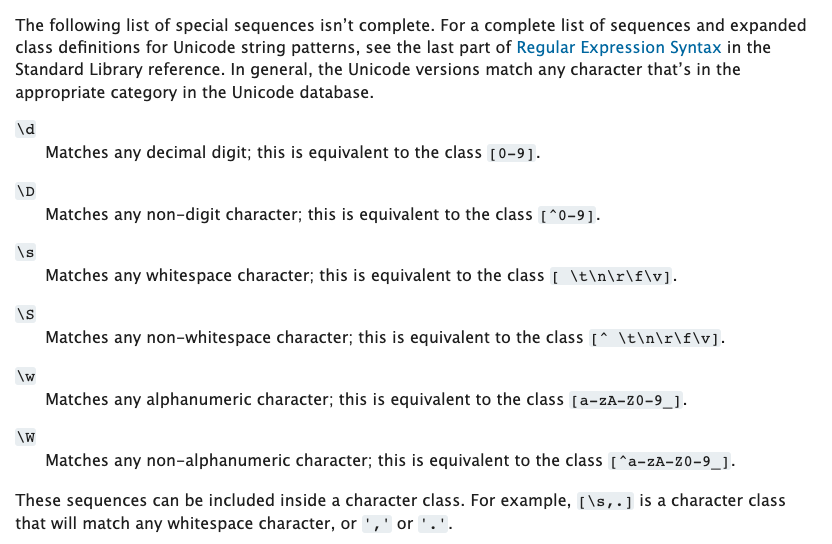

You can use special escape codes to find specific types of patterns in your data, such as digits, non-digits,whitespace, and more. For example:

Escapes are indicated by prefixing the character with a backslash (). Unfortunately, a backslash must itself be escaped in normal Python strings, and that results in expressions that are difficult to read. Using raw strings, created by prefixing the literal value with r, for creating regular expressions eliminates this problem and maintains readability.

Personally, I think this use of r to escape a backslash is probably one of the things that block someone who is not familiar with regex in Python from being able to read regex code at first. Hopefully after seeing these examples this syntax will become clear.